In [2]:
# import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [3]:
df =pd.read_pickle('../pickle_pd/pd_top_25.pkl')
features = ['lep_pt_2','met_et','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

In [16]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.4, random_state=42,shuffle = True)
 X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.5, random_state=42,shuffle = True)

In [34]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features],y_train,
             eval_set = [( X_train, y_train), ( X_test, y_test)])
y_pred = xgb_model.predict(X_test)

[0]	validation_0-mlogloss:0.87346	validation_1-mlogloss:0.87373
[1]	validation_0-mlogloss:0.74193	validation_1-mlogloss:0.74242
[2]	validation_0-mlogloss:0.65648	validation_1-mlogloss:0.65732
[3]	validation_0-mlogloss:0.59771	validation_1-mlogloss:0.59891
[4]	validation_0-mlogloss:0.55679	validation_1-mlogloss:0.55855
[5]	validation_0-mlogloss:0.52733	validation_1-mlogloss:0.52945
[6]	validation_0-mlogloss:0.50508	validation_1-mlogloss:0.50766
[7]	validation_0-mlogloss:0.48797	validation_1-mlogloss:0.49088
[8]	validation_0-mlogloss:0.47461	validation_1-mlogloss:0.47782
[9]	validation_0-mlogloss:0.46408	validation_1-mlogloss:0.46774
[10]	validation_0-mlogloss:0.45582	validation_1-mlogloss:0.45967
[11]	validation_0-mlogloss:0.44850	validation_1-mlogloss:0.45269
[12]	validation_0-mlogloss:0.44325	validation_1-mlogloss:0.44781
[13]	validation_0-mlogloss:0.43813	validation_1-mlogloss:0.44315
[14]	validation_0-mlogloss:0.43395	validation_1-mlogloss:0.43942
[15]	validation_0-mlogloss:0.43050	

In [35]:
history  = xgb_model.evals_result()

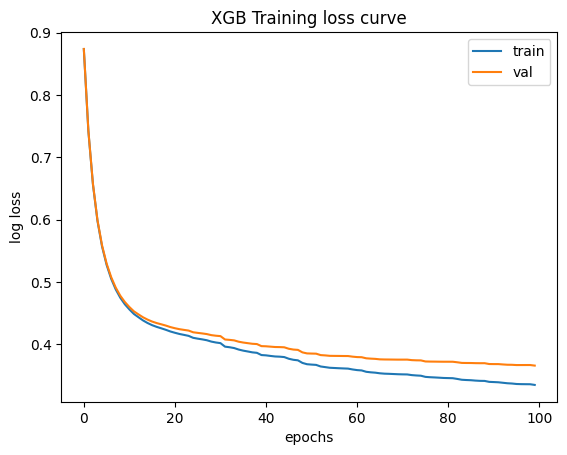

In [37]:
plt.plot(history['validation_0']['mlogloss'], label='train')
plt.plot(history['validation_1']['mlogloss'], label='val')
plt.ylabel('log loss')
plt.xlabel('epochs')
plt.title('XGB Training loss curve')
plt.legend()

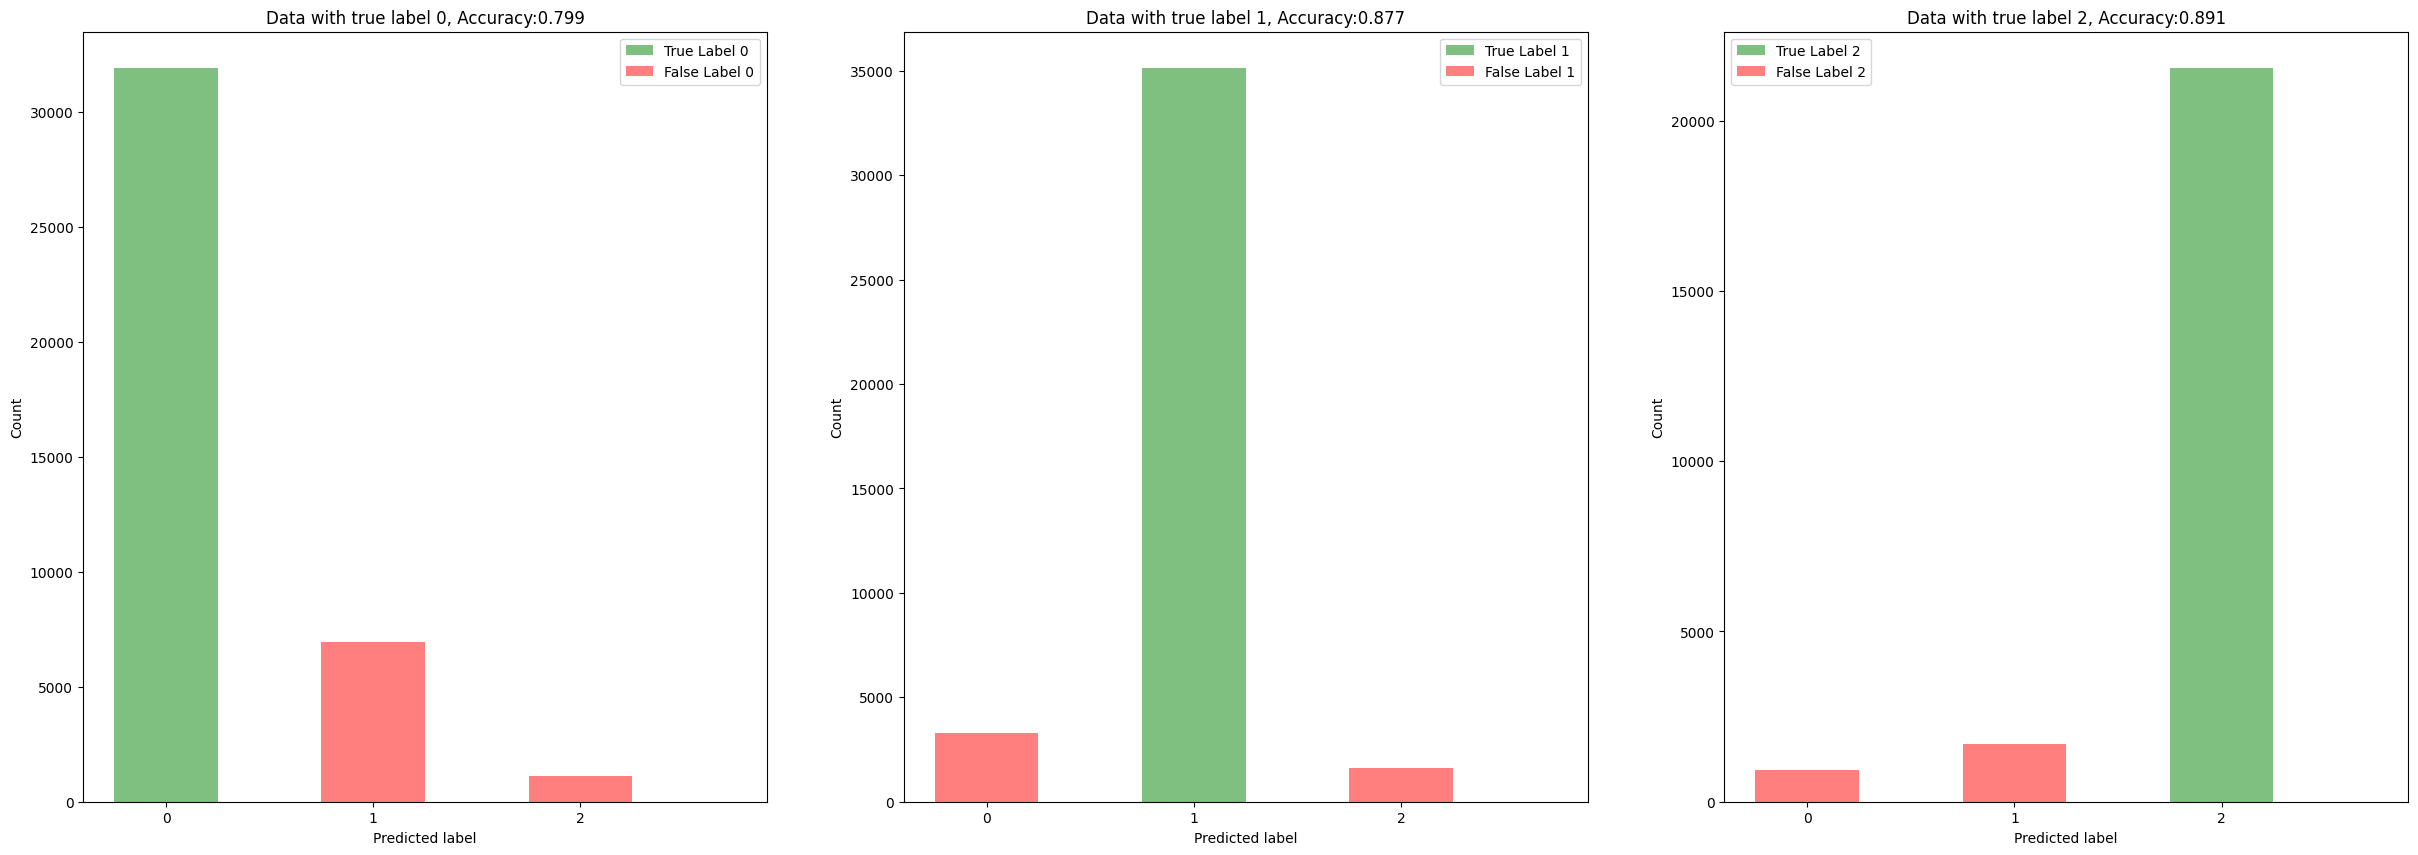

In [13]:
bins = [-0.25, 0.75, 1.75, 2.75] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label ' + str(label), align = 'mid', width = 0.5, color = 'green')
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label ' + str(label), align = 'mid', width = 0.5, color = 'red')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i}, Accuracy:{accuracy_score(test_label, pred_label):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))

In [17]:
y_pred =  xgb_model.predict(X_val)
y_pred_train = xgb_model.predict(X_train)

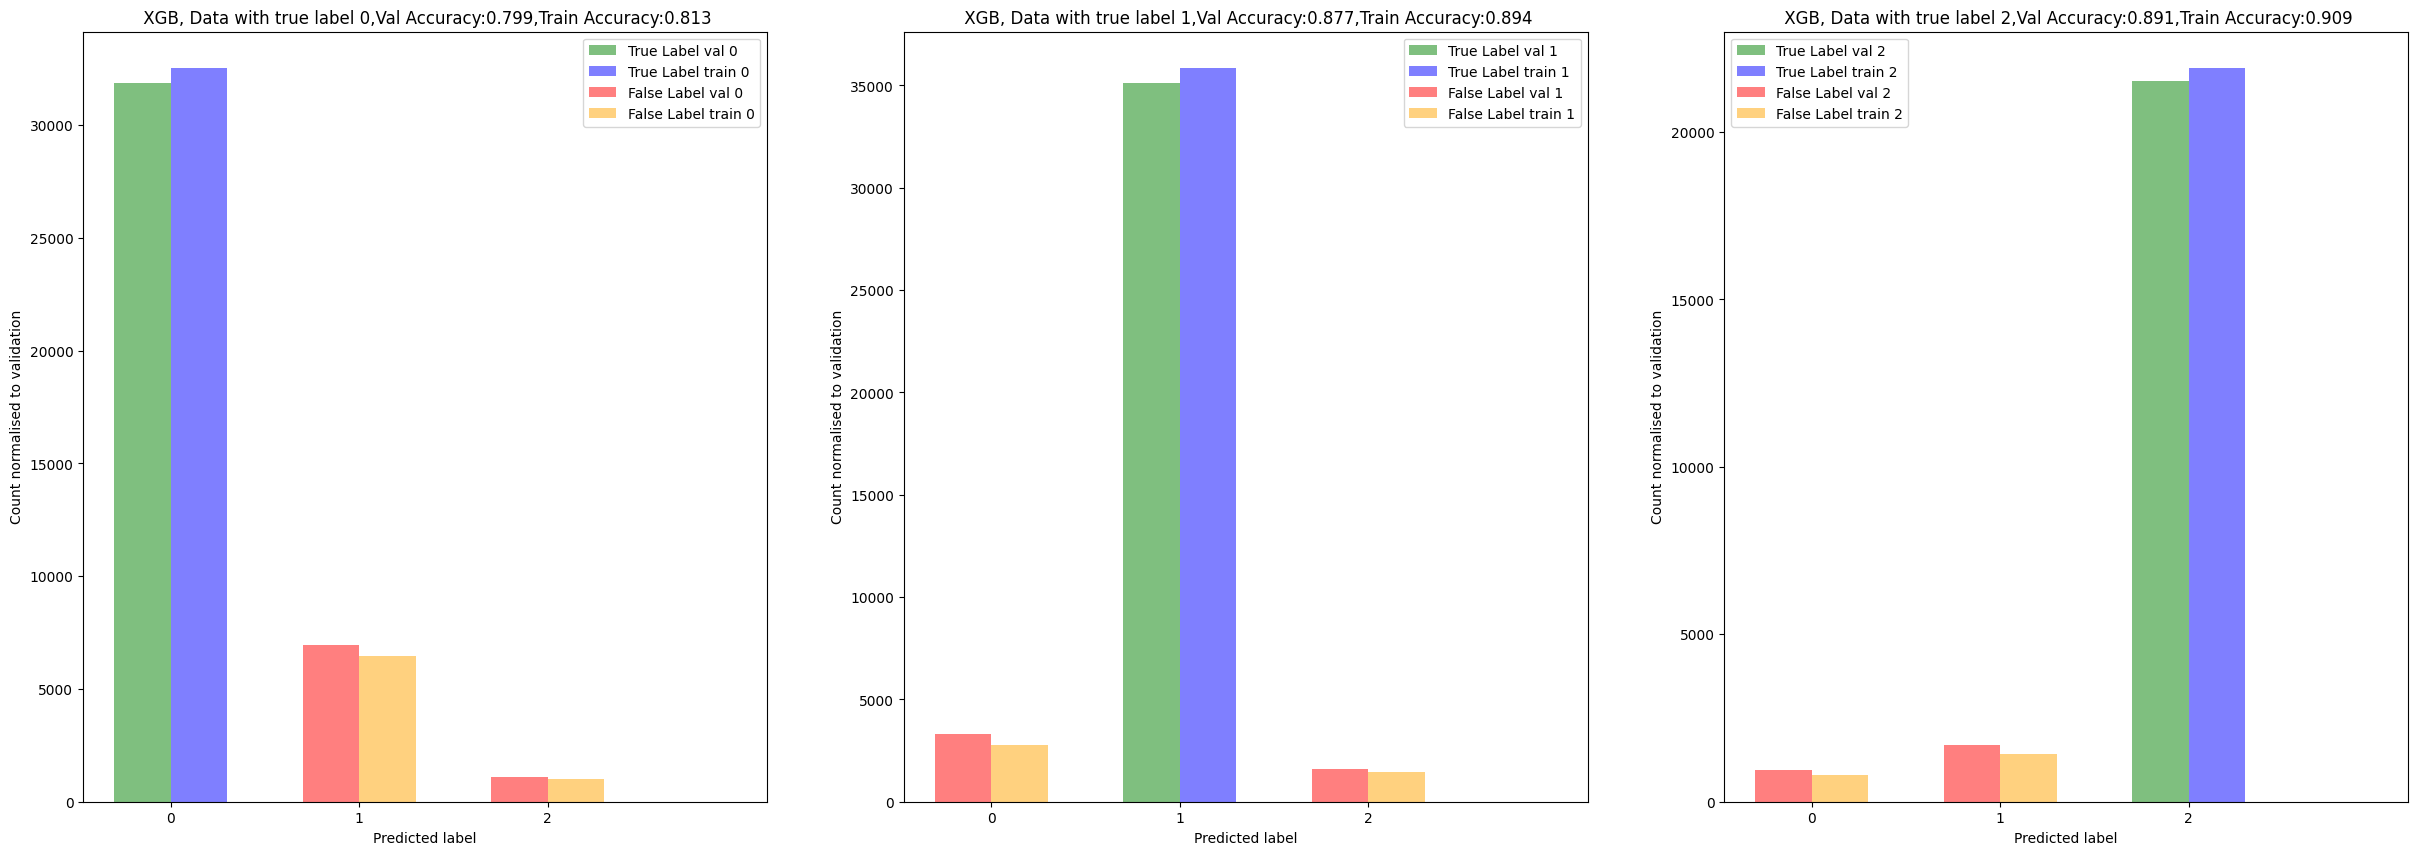

In [32]:
bins = [-0.3, 0.7, 1.7, 2.7] 
bins2 = [0, 1, 2, 3] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    
    test_label_t = y_train[y_train==label]
    pred_label_t = y_pred_train[y_train==label]
    true_label_t = pred_label_t[pred_label_t == test_label_t]
    false_label_t= pred_label_t[pred_label_t != test_label_t]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label val ' + str(label), align = 'mid', width = 0.3, color = 'green')
    ax[i].hist(true_label_t[0:int(round(len(true_label_t)/3,0))] , bins = bins2, histtype = 'barstacked', alpha=0.5, label='True Label train ' + str(label), align = 'mid', width = 0.3, color = 'blue') 
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label val ' + str(label), align = 'mid', width = 0.3, color = 'red')
    ax[i].hist(false_label_t[0:int(round(len(false_label_t)/3,0))], bins = bins2, histtype = 'barstacked', alpha=0.5, label='False Label train ' + str(label), align = 'mid', width = 0.3, color = 'orange')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f' XGB, Data with true label {i},Val Accuracy:{accuracy_score(test_label, pred_label):.3f},Train Accuracy:{accuracy_score(test_label_t, pred_label_t):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count normalised to validation')
    ax[i].legend()
    ax[i].set_xticks(range(3))

31878
35110
21538


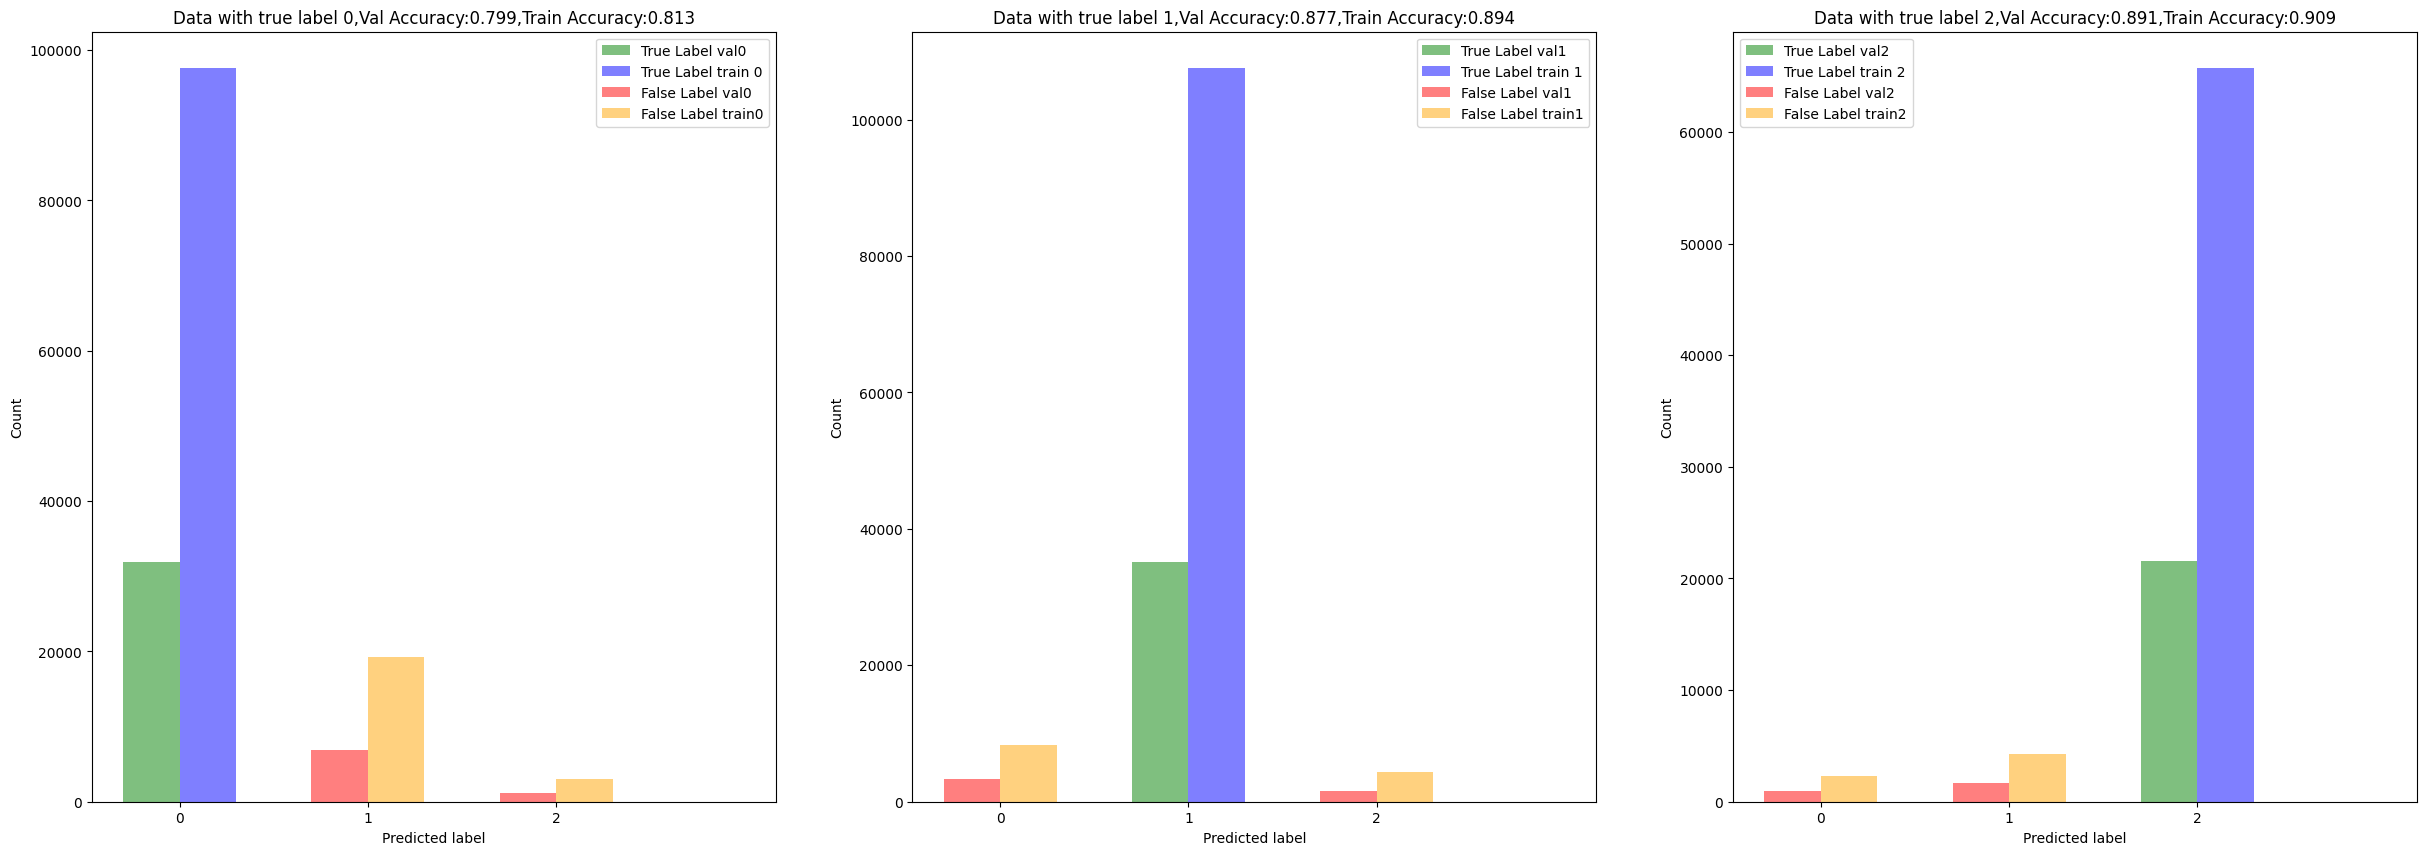

In [15]:
bins = [-0.3, 0.7, 1.7, 2.7] 
bins2 = [0, 1, 2, 3] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    
    test_label_t = y_train[y_train==label]
    pred_label_t = y_pred_train[y_train==label]
    true_label_t = pred_label_t[pred_label_t == test_label_t]
    false_label_t= pred_label_t[pred_label_t != test_label_t]
    #print(len(false_label))
    print(len(true_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label val' + str(label), align = 'mid', width = 0.3, color = 'green')
    ax[i].hist(true_label_t , bins = bins2, histtype = 'barstacked', alpha=0.5, label='True Label train ' + str(label), align = 'mid', width = 0.3, color = 'blue') 
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label val' + str(label), align = 'mid', width = 0.3, color = 'red')
    ax[i].hist(false_label_t, bins = bins2, histtype = 'barstacked', alpha=0.5, label='False Label train' + str(label), align = 'mid', width = 0.3, color = 'orange')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i},Val Accuracy:{accuracy_score(test_label, pred_label):.3f},Train Accuracy:{accuracy_score(test_label_t, pred_label_t):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))